<a href="https://colab.research.google.com/github/23subbhashit/VR-ASSIGNMENTS/blob/main/VR_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

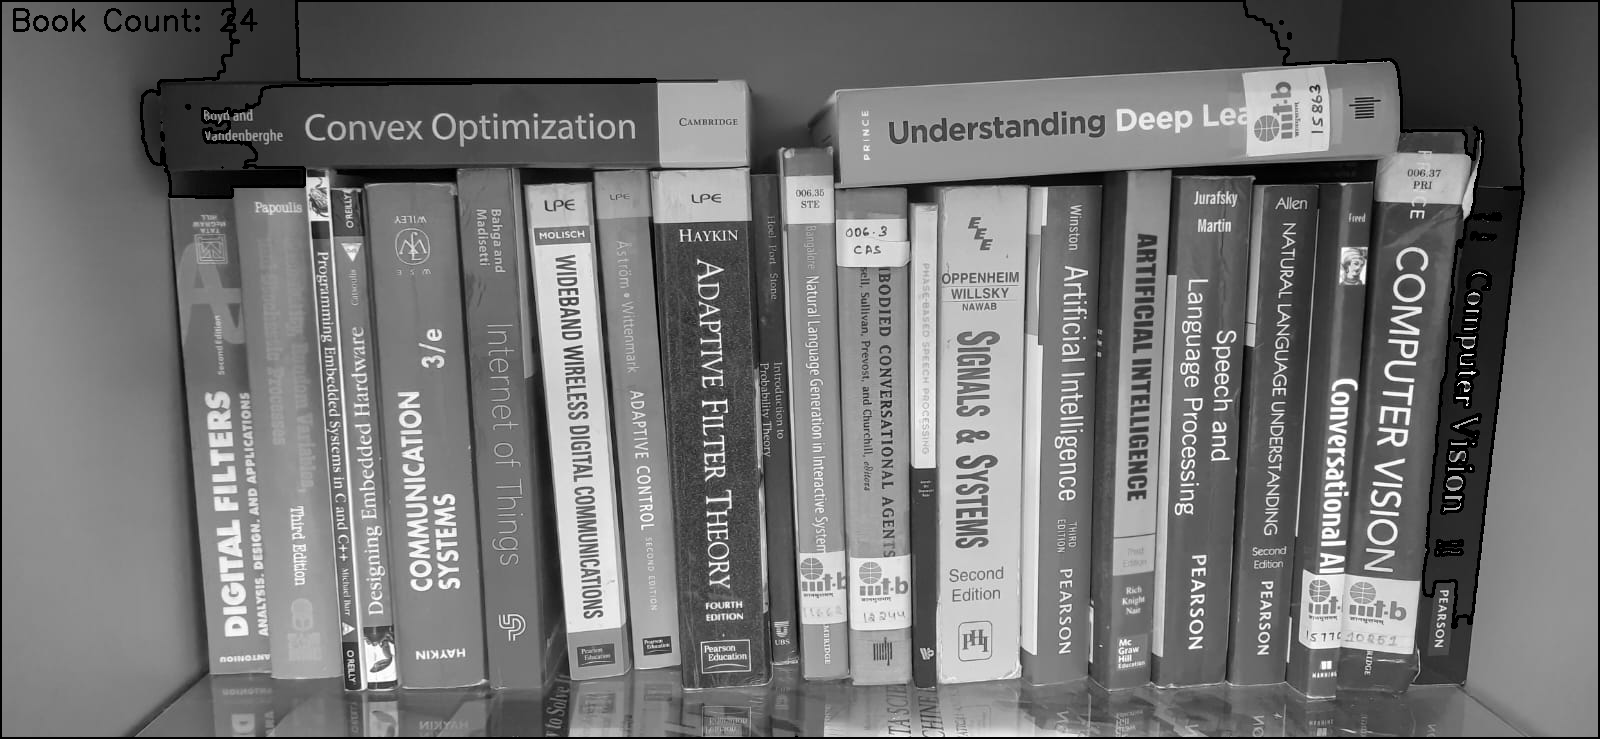

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('BookCount_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding to create a binary image
_, thresholded = cv2.threshold(blurred, 50, 80, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Count the number of books based on the number of contours
book_count = len(contours)

# Display the result with the book count as the title
cv2.putText(image_with_contours, f'Book Count: {book_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image_with_contours)


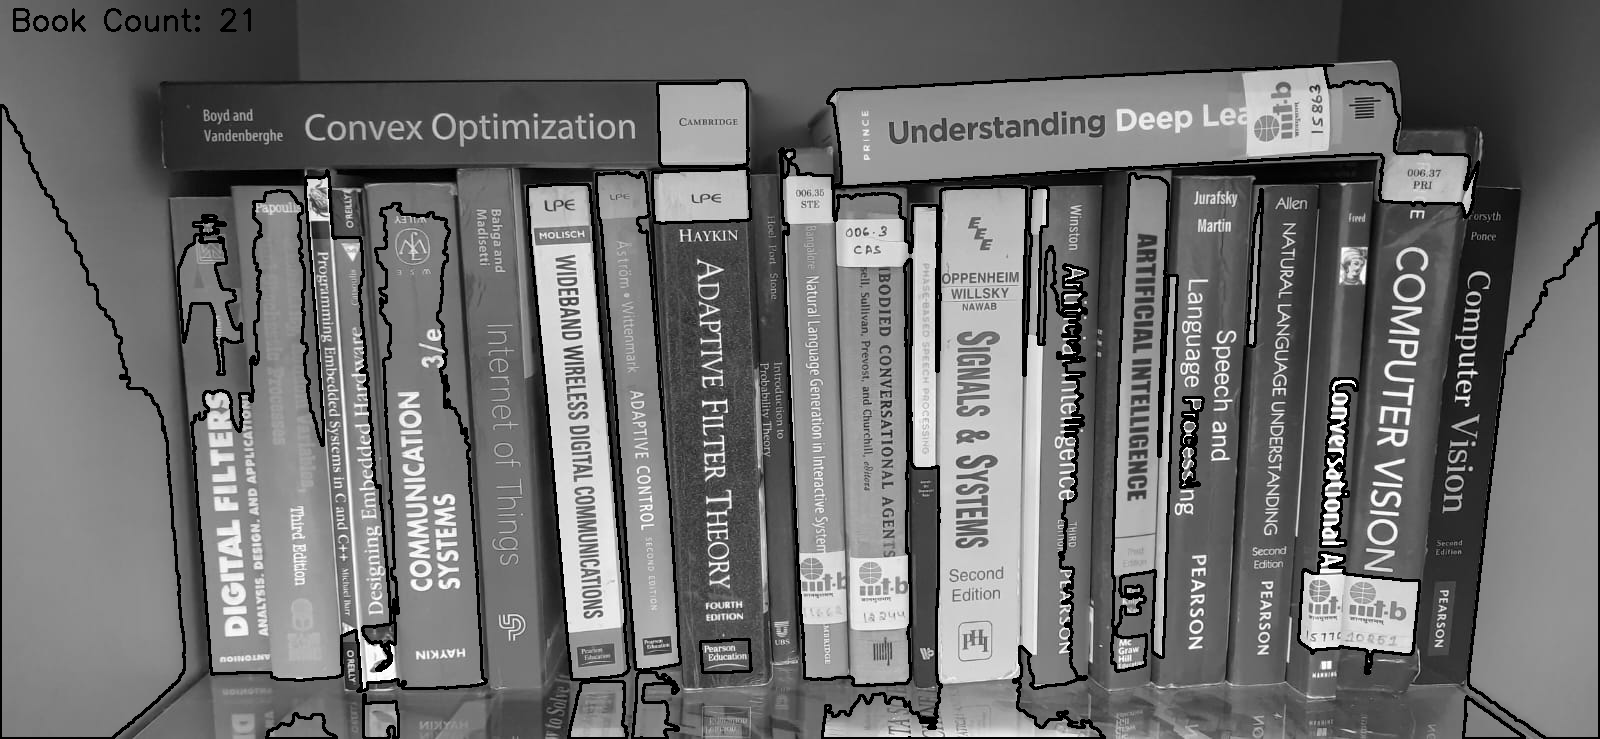

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab

# Load the image
image = cv2.imread('BookCount_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding to create a binary image
_, thresholded = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_contours = image.copy()

# Initialize a variable to count the number of books
book_count = 0

# Set a threshold for contour area (adjust this value based on your image)
min_contour_area = 1000

for contour in contours:
    area = cv2.contourArea(contour)

    # Filter out small contours
    if area > min_contour_area:
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
        book_count += 1

# Display the result with the book count as the title
cv2.putText(image_with_contours, f'Book Count: {book_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image_with_contours)


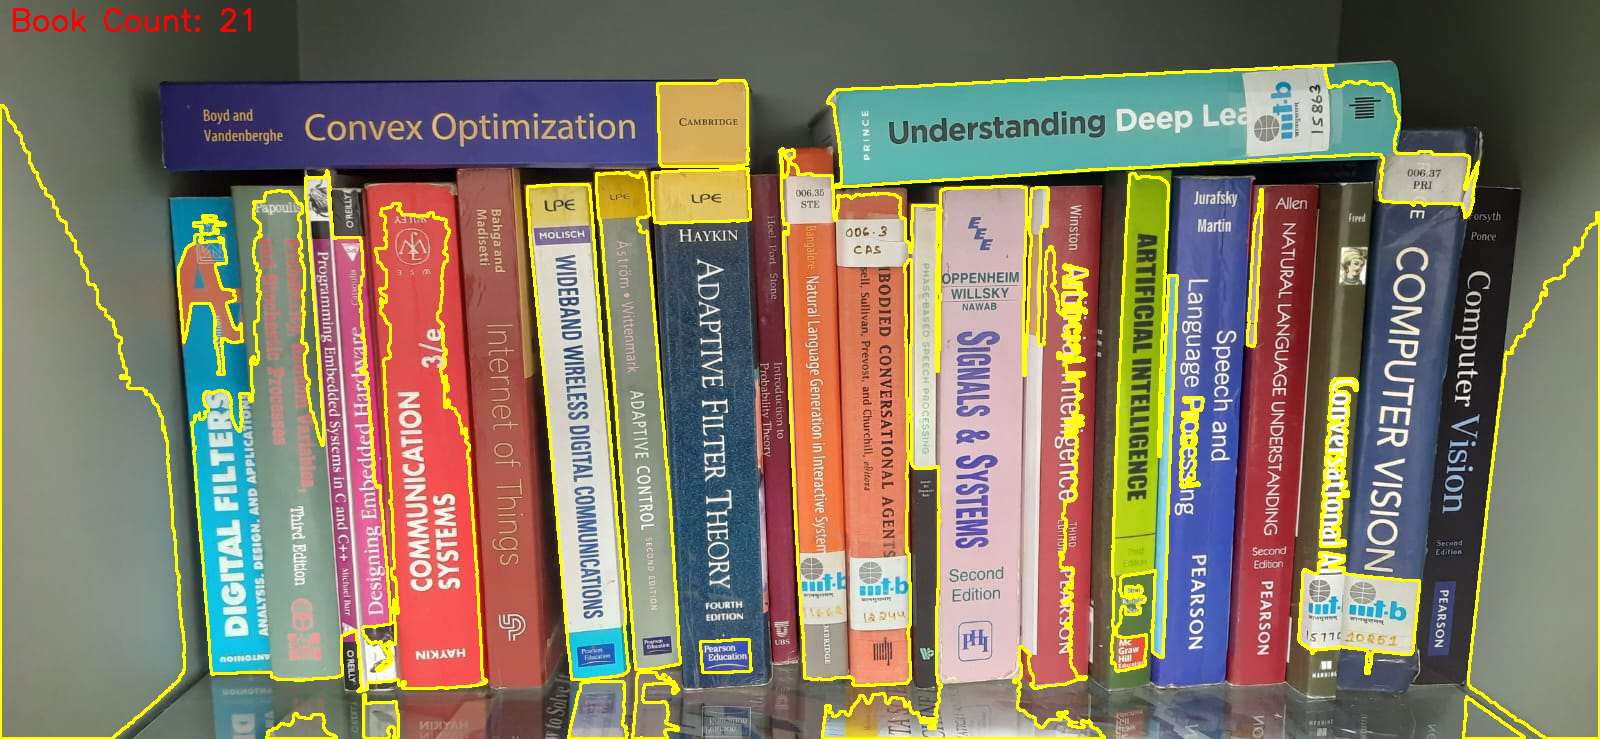

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab

# Load the color image
image = cv2.imread('BookCount_1.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding to create a binary image
_, thresholded = cv2.threshold(blurred, 120, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_contours = image.copy()

# Initialize a variable to count the number of books
book_count = 0

# Set a threshold for contour area (adjust this value based on your image)
min_contour_area = 1000

# Draw borders around objects in yellow color on the original image
for contour in contours:
    area = cv2.contourArea(contour)

    # Filter out small contours
    if area > min_contour_area:
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 255), 2)  # Yellow borders
        book_count += 1

# Display the result with the book count as the title
cv2.putText(image_with_contours, f'Book Count: {book_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image_with_contours)


In [ ]:
# Download YOLOv3 weights file
!wget https://pjreddie.com/media/files/yolov3.weights

# Download YOLOv3 configuration file
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg

# Download YOLOv3 class names file
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names


--2024-01-30 16:42:21--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  12.8MB/s    in 41s     

2024-01-30 16:43:03 (5.71 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-01-30 16:43:03--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2024-01-30 16:43:03--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiti

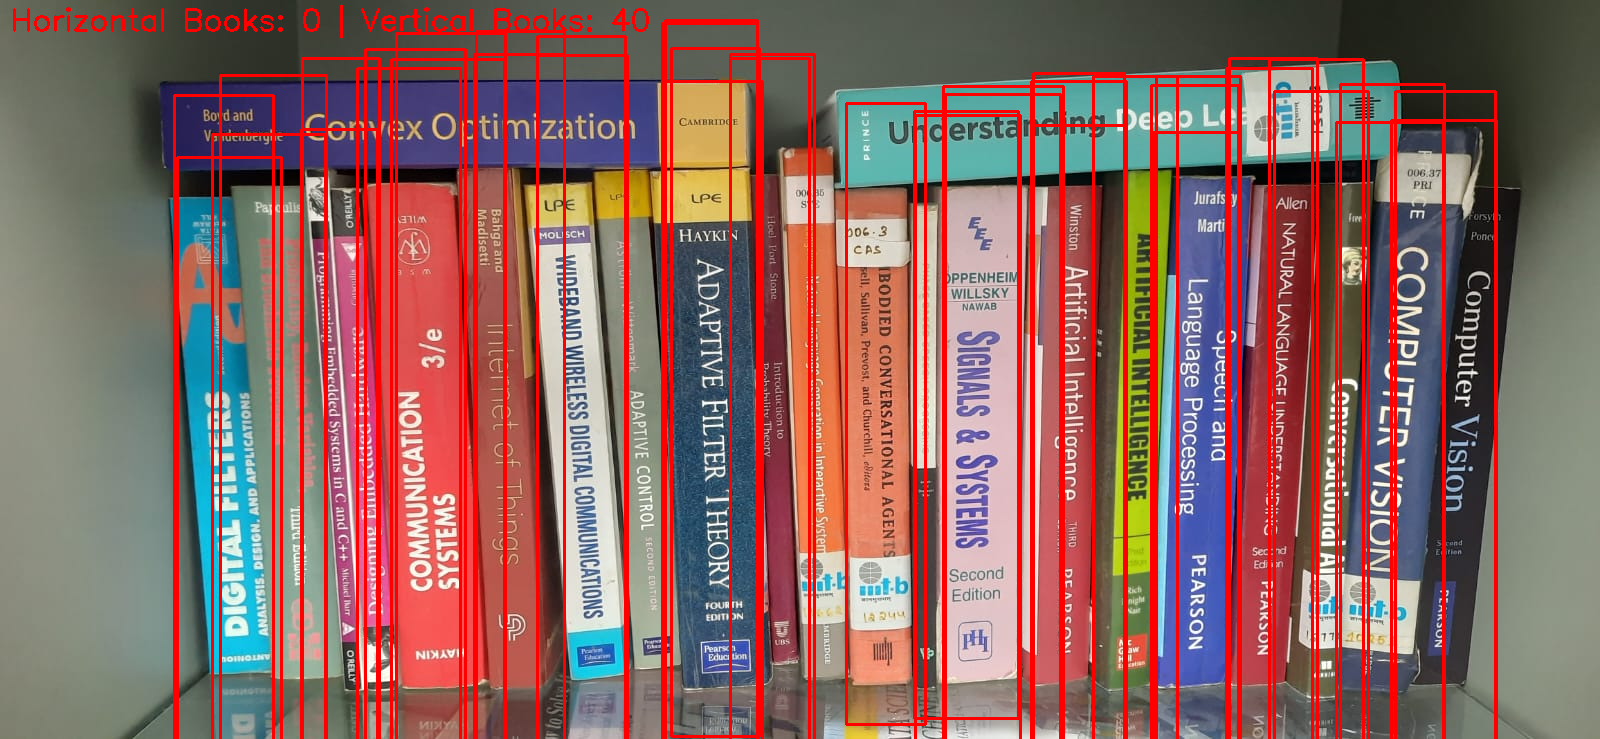

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab
import numpy as np


# Load YOLO
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# Load classes
with open('coco.names', 'r') as f:
    classes = f.read().strip().split('\n')

# Load image
image = cv2.imread('BookCount_1.jpeg')
height, width = image.shape[:2]

# Create blob from image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set the input to the network
net.setInput(blob)

# Get output layer names
output_layer_names = net.getUnconnectedOutLayersNames()

# Forward pass
detections = net.forward(output_layer_names)

# Initialize counters for horizontal and vertical books
horizontal_books = 0
vertical_books = 0

# Loop over the detections
for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(obj[0] * width)
            center_y = int(obj[1] * height)
            w = int(obj[2] * width)
            h = int(obj[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Check if aspect ratio suggests a horizontal book
            aspect_ratio = w / h
            if aspect_ratio > 1.5:  # Adjust this value based on your image
                horizontal_books += 1
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw green border
            else:
                vertical_books += 1
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw red border

# Display the result with the book count as the title
cv2.putText(image, f'Horizontal Books: {horizontal_books} | Vertical Books: {vertical_books}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image)


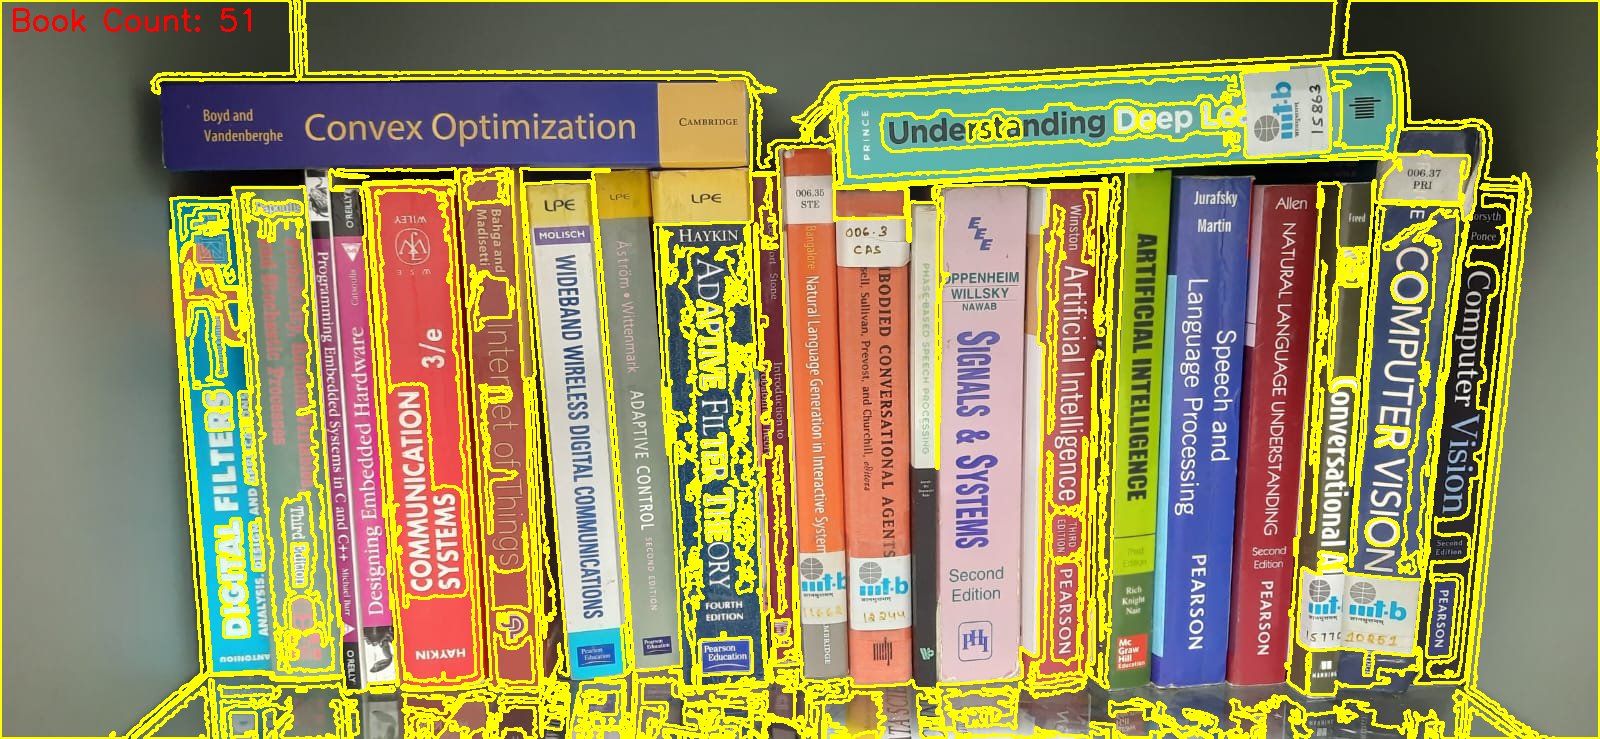

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab

# Load the color image
image = cv2.imread('BookCount_1.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Sobel edge detector
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the gradient magnitude to the range [0, 255]
gradient_magnitude_normalized = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))

# Apply adaptive thresholding to create a binary edge image
edges = cv2.adaptiveThreshold(gradient_magnitude_normalized, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Find contours in the binary edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
image_with_contours = image.copy()

# Initialize a variable to count the number of books
book_count = 0

# Set a threshold for contour area (adjust this value based on your image)
min_contour_area = 500

# Draw borders around objects in yellow color on the original image
for contour in contours:
    area = cv2.contourArea(contour)

    # Filter out small contours
    if area > min_contour_area:
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 255), 2)  # Yellow borders
        book_count += 1

# Display the result with the book count as the title
cv2.putText(image_with_contours, f'Book Count: {book_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image_with_contours)


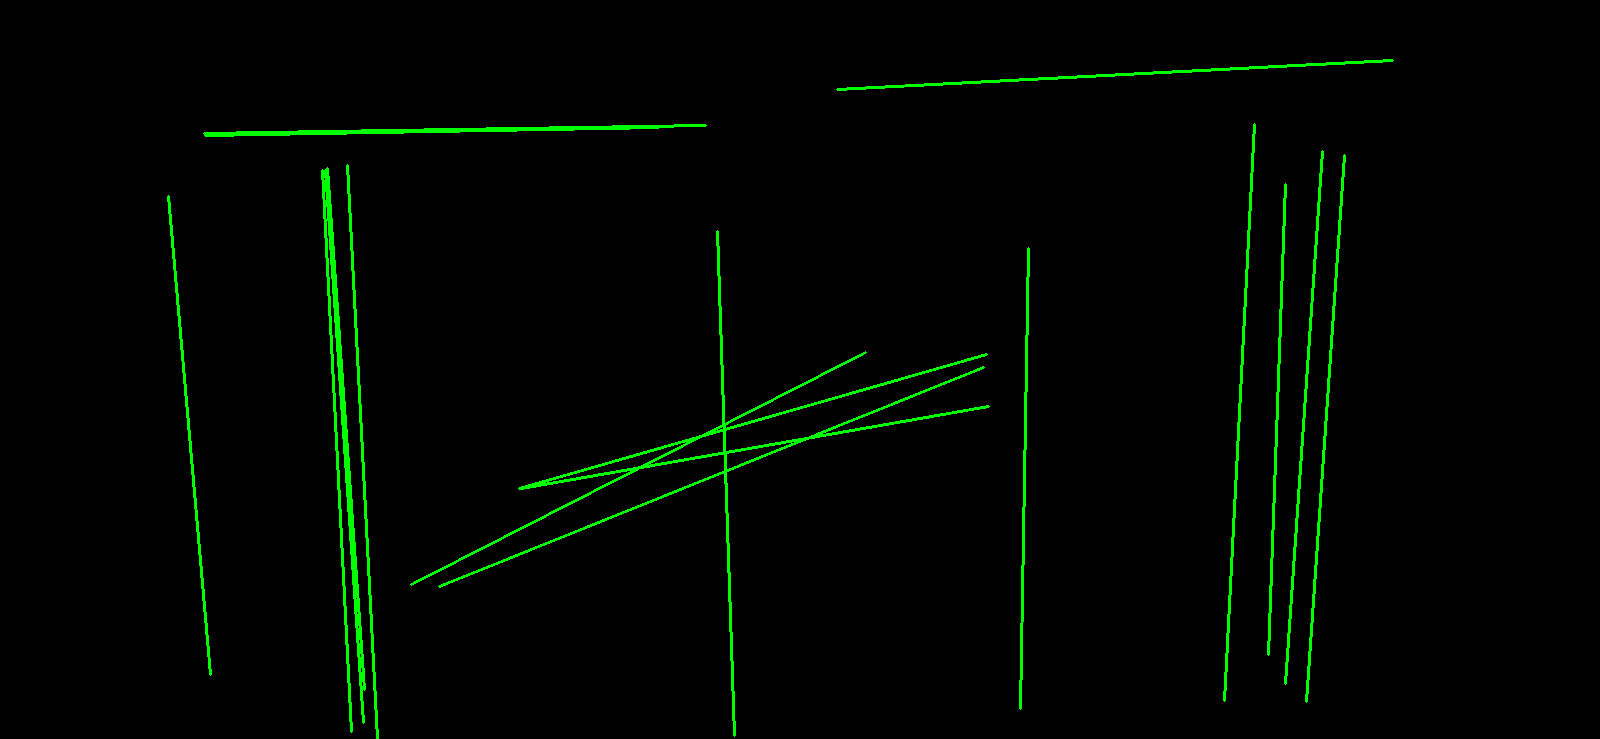

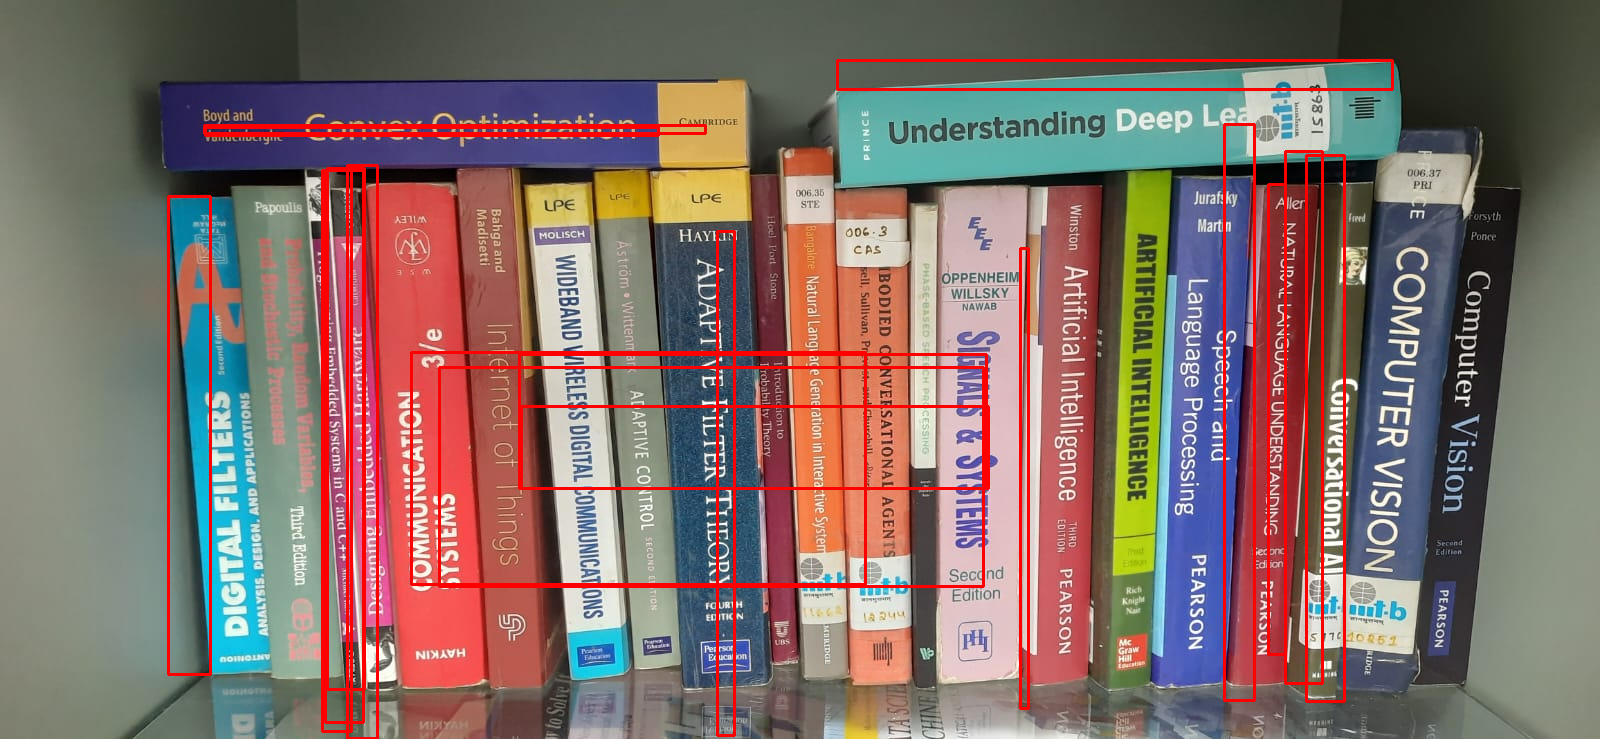

Number of books detected: 110


In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_books(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply edge detection (you can use different methods)
    edges = cv2.Canny(gray, 50, 150)

    # Use Hough Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=450, maxLineGap=23)
    # lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=400, maxLineGap=50)
    # A larger minLineLength will filter out shorter lines, and a larger maxLineGap will allow for larger gaps
    # between line segments to be considered as part of the same line.

    # Create an image for green lines visualization
    lines_image = np.zeros_like(image)

    # Draw green lines on the lines image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Identify rectangles
    rectangles = []
    for line1 in lines:
        for line2 in lines:
            if line1 is not line2:
                x1, y1, x2, y2 = line1[0]
                x3, y3, x4, y4 = line2[0]
                angle1 = np.arctan2(y2 - y1, x2 - x1)
                angle2 = np.arctan2(y4 - y3, x4 - x3)

                # Check if the lines are roughly perpendicular and form a rectangle
                if np.abs(angle1 - angle2) < np.pi/4:
                    rectangles.append((line1[0], line2[0]))

    # Create an image for rectangles visualization
    rectangles_image = image.copy()

    # Draw rectangles on the rectangles image
    for rectangle in rectangles:
        (x1, y1, x2, y2), (x3, y3, x4, y4) = rectangle
        cv2.rectangle(rectangles_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.rectangle(rectangles_image, (x3, y3), (x4, y4), (0, 0, 255), 2)

    # Display the result using cv2_imshow
    cv2_imshow(lines_image)
    cv2_imshow(rectangles_image)

    # Return the count of rectangles (books)
    return len(rectangles)

# Example usage
image_path = '/content/BookCount_1.jpeg'
book_count = detect_books(image_path)
print(f'Number of books detected: {book_count}')
